<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

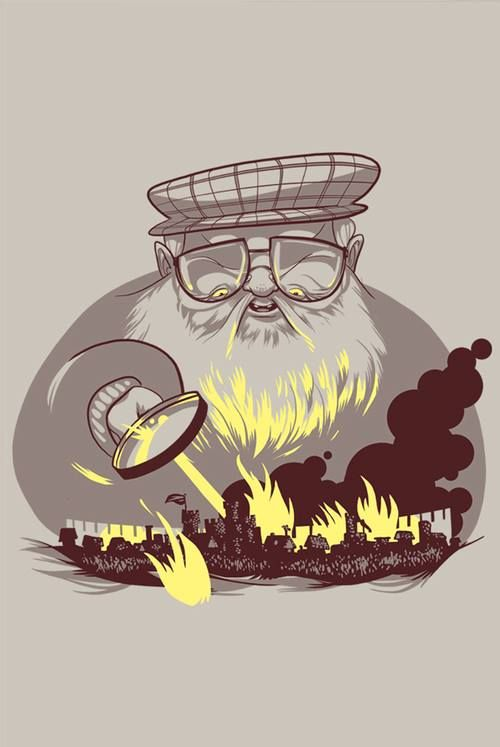

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [457]:
from sklearn.utils.extmath import density
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

zsh:1: command not found: gdown
zsh:1: command not found: gdown


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [458]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [459]:
train_df = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
test_df = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')   

Заполним столбец age медианой, учитывая что она будет зависить от количества и самих значений, будем заполнять раздельно train и test

In [460]:
columns_to_fill = ['age',]
train_df_col_to_fill = train_df[columns_to_fill].median()
test_df_col_to_fill = test_df[columns_to_fill].median()

train_df.loc[:, columns_to_fill]  = train_df.loc[:, columns_to_fill].fillna(train_df_col_to_fill)

test_df.loc[:, columns_to_fill] = test_df.loc[:, columns_to_fill].fillna(test_df_col_to_fill)

Теперь мы можем объединить оба фрейма в один, чтобы одновременно обрабатывать данные

In [461]:
data_frame = pd.concat([train_df, test_df], keys=['train', 'test'])
data_frame

name                 title  male   culture  \
      S.No                                                               
train 1     Viserys II Targaryen                   NaN     1       NaN   
      2              Walder Frey  Lord of the Crossing     1  Rivermen   
      3             Addison Hill                   Ser     1       NaN   
      4              Aemma Arryn                 Queen     0       NaN   
      5           Sylva Santagar            Greenstone     0   Dornish   
...                          ...                   ...   ...       ...   
test  1942                 Luwin                   NaN     1  Westeros   
      1943                  Reek                   NaN     1       NaN   
      1944      Symeon Star-Eyes                   NaN     1       NaN   
      1945             Coldhands                   NaN     1       NaN   
      1946       Tytos Lannister         Casterly Rock     1       NaN   

            dateOfBirth              mother            father  \
      S.No                                                      
train 1             NaN  Rhaenyra Targaryen  Daemon Targaryen   
      2           208.0                 NaN               NaN   
      3             NaN                 NaN               NaN   
      4            82.0                 NaN               NaN   
      5           276.0                 NaN               NaN   
...                 ...                 ...               ...   
test  1942          NaN                 NaN               NaN   
      1943          NaN                 NaN               NaN   
      1944          NaN                 NaN               NaN   
      1945          NaN                 NaN               NaN   
      1946        220.0                 NaN               NaN   

                          heir            house               spouse  ...  \
      S.No                                                            ...   
train 1     Aegon IV Targaryen              NaN                  NaN  ...   
      2                    NaN       House Frey          Perra Royce  ...   
      3                    NaN      House Swyft                  NaN  ...   
      4                    NaN      House Arryn  Viserys I Targaryen  ...   
      5                    NaN   House Santagar      Eldon Estermont  ...   
...                        ...              ...                  ...  ...   
test  1942                 NaN      House Stark                  NaN  ...   
      1943                 NaN     House Bolton                  NaN  ...   
      1944                 NaN              NaN                  NaN  ...   
      1945                 NaN  Three-eyed crow                  NaN  ...   
      1946                 NaN  House Lannister       Jeyne Marbrand  ...   

            isAliveMother  isAliveFather  isAliveHeir  isAliveSpouse  \
      S.No                                                             
train 1               1.0            0.0          0.0            NaN   
      2               NaN            NaN          NaN            1.0   
      3               NaN            NaN          NaN            NaN   
      4               NaN            NaN          NaN            0.0   
      5               NaN            NaN          NaN            1.0   
...                   ...            ...          ...            ...   
test  1942            NaN            NaN          NaN            NaN   
      1943            NaN            NaN          NaN            NaN   
      1944            NaN            NaN          NaN            NaN   
      1945            NaN            NaN          NaN            NaN   
      1946            NaN            NaN          NaN            1.0   

            isMarried  isNoble   age  numDeadRelations  popularity  isAlive  
      S.No                                                                   
train 1             0        0  24.0                11    0.605351      0.0  
      2             1        1  97.0          

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

Мы можем создать новую колонку, учитывая что мы знаем возраст персонажа, и отсчет даты его рождения, мы можем предсказать, жив персонаж или нет

In [462]:
data_frame['live_person'] = np.where(data_frame['dateOfBirth'].notnull() & data_frame['age'].notnull()&(data_frame['dateOfBirth']+data_frame['age'] >= 305), 1, 0)
data_frame.drop(columns=['dateOfBirth'], axis=1, inplace=True)

Так же обработаем значения колонки "house" если общее количество персонажей в этом типе >5 то будем заполнять колонку единицами

In [463]:
houses_data_frame = data_frame.house.value_counts()

data_frame['house_counts'] = data_frame['house'].map(houses_data_frame).apply(lambda x: 1 if (x>5) and pd.notnull(x) else 0)

data_frame.drop(columns='house', axis=1, inplace=True)

Остальное заполним "пустыми" значениями

In [464]:
columns_to_fill_zeros = ['isAliveMother', 'isAliveFather', 'isAliveSpouse', 'isAliveHeir']
data_frame.loc[:, columns_to_fill_zeros] = data_frame.loc[:, columns_to_fill_zeros].fillna(0)

data_frame.loc[:, 'title'] = data_frame.loc[:, 'title'].fillna('deafult_character')

columns_to_fill_nothing = ['culture', 'mother', 'father', 'heir', 'spouse']
data_frame.loc[:, columns_to_fill_nothing] = data_frame.loc[:, columns_to_fill_nothing].fillna('nothing')

data_frame.isna().sum()

name                  0
title                 0
male                  0
culture               0
mother                0
father                0
heir                  0
spouse                0
book1                 0
book2                 0
book3                 0
book4                 0
book5                 0
isAliveMother         0
isAliveFather         0
isAliveHeir           0
isAliveSpouse         0
isMarried             0
isNoble               0
age                   0
numDeadRelations      0
popularity            0
isAlive             389
live_person           0
house_counts          0
dtype: int64

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [465]:
data_frame['isPopular'] = np.where(data_frame['popularity'] > 0.5, 1, 0)
data_frame.drop(columns='popularity', axis=1, inplace=True)

data_frame['boolDeadRelations'] = np.where(data_frame['numDeadRelations']>0, 1, 0)
data_frame.drop(columns = 'numDeadRelations', axis=1, inplace=True)

In [466]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

Обработаем приведенный словарь и перезапишем данные в колонку "culture"

In [467]:
change_val = {}
for key, values in cult.items():
    for value in values:
        change_val[value.title()] = key
data_frame['culture'] = data_frame['culture'].replace(change_val)
data_frame['culture'].value_counts()

culture
nothing                    1269
Northmen                    124
Ironborn                    112
Free Folk                    56
Valyrian                     43
Braavosi                     43
Dornish                      41
Ghiscari                     26
Dothraki                     23
Valemen                      19
Rivermen                     19
Reach                        18
Westermen                    15
Vale mountain clans          15
Westerosi                    12
Free folk                    11
northmen                      9
Stormlander                   8
Tyroshi                       7
Qartheen                      7
Lysene                        7
Summer Islands                7
Ironmen                       5
Northern mountain clans       5
Astapori                      4
Crannogmen                    4
Meereenese                    3
Pentoshi                      3
Myrish                        3
Asshai                        2
Riverlands                    2


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [468]:
data_frame

name                 title  male    culture  \
      S.No                                                                
train 1     Viserys II Targaryen     deafult_character     1    nothing   
      2              Walder Frey  Lord of the Crossing     1   Rivermen   
      3             Addison Hill                   Ser     1    nothing   
      4              Aemma Arryn                 Queen     0    nothing   
      5           Sylva Santagar            Greenstone     0    Dornish   
...                          ...                   ...   ...        ...   
test  1942                 Luwin     deafult_character     1  Westerosi   
      1943                  Reek     deafult_character     1    nothing   
      1944      Symeon Star-Eyes     deafult_character     1    nothing   
      1945             Coldhands     deafult_character     1    nothing   
      1946       Tytos Lannister         Casterly Rock     1    nothing   

                        mother            father                heir  \
      S.No                                                             
train 1     Rhaenyra Targaryen  Daemon Targaryen  Aegon IV Targaryen   
      2                nothing           nothing             nothing   
      3                nothing           nothing             nothing   
      4                nothing           nothing             nothing   
      5                nothing           nothing             nothing   
...                        ...               ...                 ...   
test  1942             nothing           nothing             nothing   
      1943             nothing           nothing             nothing   
      1944             nothing           nothing             nothing   
      1945             nothing           nothing             nothing   
      1946             nothing           nothing             nothing   

                         spouse  book1  book2  ...  isAliveHeir  \
      S.No                                     ...                
train 1                 nothing      0      0  ...          0.0   
      2             Perra Royce      1      1  ...          0.0   
      3                 nothing      0      0  ...          0.0   
      4     Viserys I Targaryen      0      0  ...          0.0   
      5         Eldon Estermont      0      0  ...          0.0   
...                         ...    ...    ...  ...          ...   
test  1942              nothing      1      1  ...          0.0   
      1943              nothing      0      1  ...          0.0   
      1944              nothing      1      1  ...          0.0   
      1945              nothing      0      0  ...          0.0   
      1946       Jeyne Marbrand      0      0  ...          0.0   

            isAliveSpouse  isMarried  isNoble   age  isAlive  live_person  \
      S.No                                                                  
train 1               0.0          0        0  24.0      0.0            0   
      2               1.0          1        1  97.0      1.0            1   
      3               0.0          0        1  24.0      1.0            0   
      4               0.0          1        1  23.0      0.0            0   
      5               1.0          1        1  29.0      1.0            1   
...                   ...        ...      ...   ...      ...          ...   
test  1942            0.0          0        0  32.0      NaN            0   
      1943            0.0          0        0  32.0      NaN            0   
      1944            0.0          0        0  32.0      NaN            0   
      1945            0.0          0        0  32.0      NaN            0   
      1946            1.0          1        1  47.0      NaN            0   

            house_counts  isPopular  boolDeadRelations  
      S.No                                              
train 1                0          1                  1  
      2                1          1                  1  
      3      

Удалим несущественные столбцы

In [469]:
data_frame.drop(columns=['title', 'name',  'mother', 'father', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'book1', 'book2', 'book3', 'book4', 'book5'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

Переменная категориальная


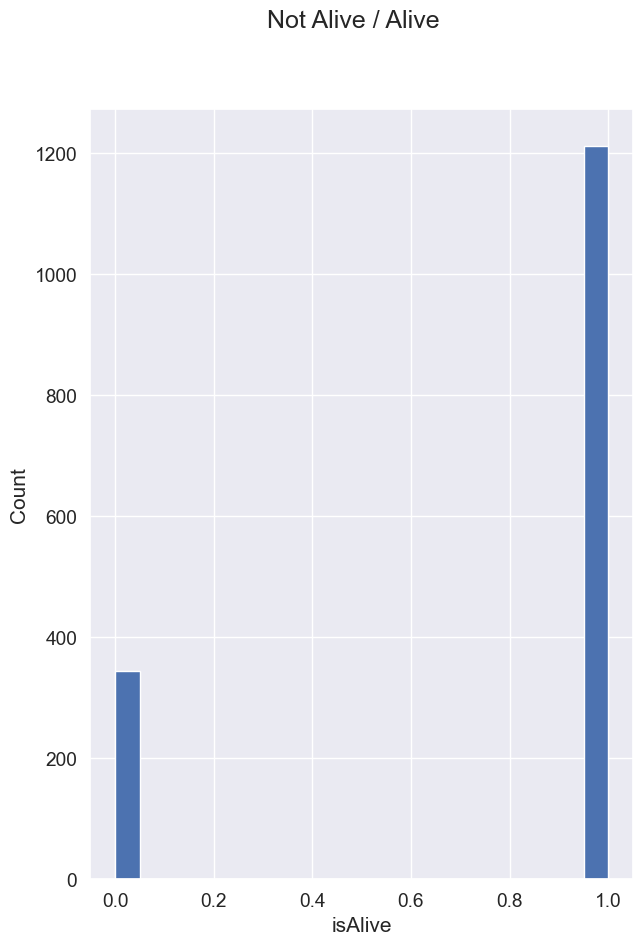

In [470]:
plt.figure(figsize=(7, 10))
data_frame_without_na = data_frame.dropna()
data_frame_without_na['isAlive'].hist(density=False, bins = 20)
plt.xlabel('isAlive')
plt.ylabel('Count')

plt.suptitle('Not Alive / Alive')

plt.show()

In [471]:
count_alive = len(data_frame_without_na[(data_frame_without_na.isAlive==1)])
count_not_ailve = len(data_frame_without_na[(data_frame_without_na.isAlive==0)])
f"Можем видеть разность в {count_alive/count_not_ailve}, соответственно фрейм не сбалансирован"

'Можем видеть разность в 3.5130434782608697, соответственно фрейм не сбалансирован'

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [472]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['culture', 'heir'] 

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

one_hot_encoded = encoder.fit_transform(data_frame[categorical_columns])

one_hot_data = pd.DataFrame(one_hot_encoded, columns = encoder.get_feature_names_out(categorical_columns), index=data_frame.index)

data_frame_encoded = pd.concat([data_frame, one_hot_data], axis=1)

data_frame_encoded = data_frame_encoded.drop(categorical_columns, axis=1)

all_columns = data_frame_encoded.columns.tolist()
all_columns

['male',
 'isMarried',
 'isNoble',
 'age',
 'isAlive',
 'live_person',
 'house_counts',
 'isPopular',
 'boolDeadRelations',
 'culture_Andal',
 'culture_Asshai',
 "culture_Asshai'i",
 'culture_Astapor',
 'culture_Astapori',
 'culture_Braavosi',
 'culture_Crannogmen',
 'culture_Dornish',
 'culture_Dothraki',
 'culture_Free Folk',
 'culture_Free folk',
 'culture_Ghiscari',
 'culture_Ibbenese',
 'culture_Ironborn',
 'culture_Ironmen',
 'culture_Lhazareen',
 'culture_Lhazarene',
 'culture_Lysene',
 'culture_Meereen',
 'culture_Meereenese',
 'culture_Myrish',
 'culture_Naathi',
 'culture_Northern mountain clans',
 'culture_Northmen',
 'culture_Norvoshi',
 'culture_Pentoshi',
 'culture_Qartheen',
 'culture_Qohor',
 'culture_Reach',
 'culture_Rhoynar',
 'culture_Riverlands',
 'culture_Rivermen',
 'culture_Sistermen',
 'culture_Stormlander',
 'culture_Summer Islands',
 'culture_Tyroshi',
 'culture_Vale',
 'culture_Vale mountain clans',
 'culture_Valemen',
 'culture_Valyrian',
 'culture_Westerme

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

<Axes: >

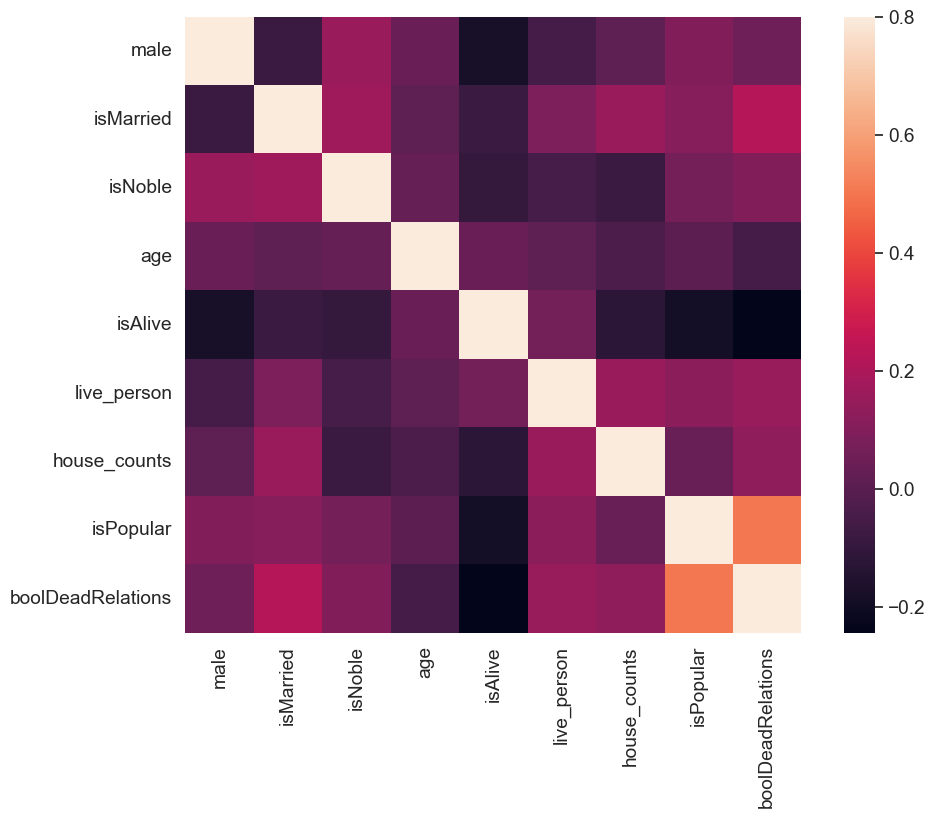

In [516]:
df_heatmap = data_frame.select_dtypes(include=np.number)
df_heatmap.loc[:, 'isAlive'] = df_heatmap.loc[:, 'isAlive'].fillna(0)
corrmat = df_heatmap.corr()
f, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corrmat, vmax=.8, square=True)

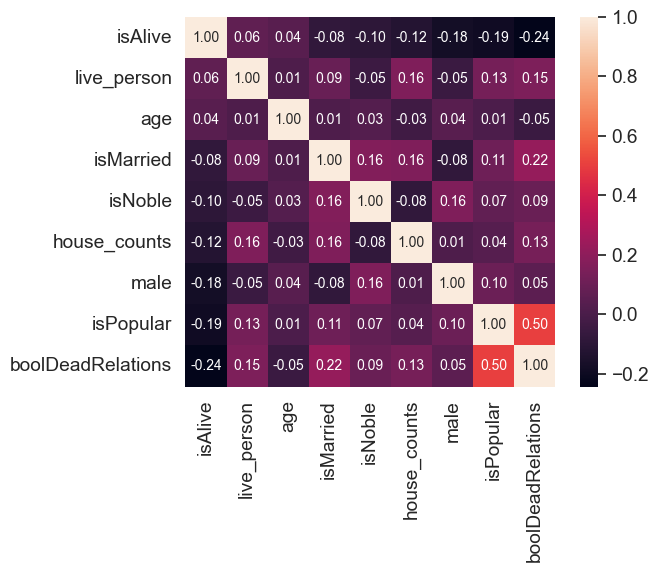

In [517]:
k = 10
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(df_heatmap[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show() 

Видим небольшие корреляции у boolDeadRelations. Так же можем заметить что isAlive коррелирует с boolDeadRelations, isPopular, male и немного с house_counts

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [475]:
data_frame_encoded

male  isMarried  isNoble   age  isAlive  live_person  \
      S.No                                                         
train 1        1          0        0  24.0      0.0            0   
      2        1          1        1  97.0      1.0            1   
      3        1          0        1  24.0      1.0            0   
      4        0          1        1  23.0      0.0            0   
      5        0          1        1  29.0      1.0            1   
...          ...        ...      ...   ...      ...          ...   
test  1942     1          0        0  32.0      NaN            0   
      1943     1          0        0  32.0      NaN            0   
      1944     1          0        0  32.0      NaN            0   
      1945     1          0        0  32.0      NaN            0   
      1946     1          1        1  47.0      NaN            0   

            house_counts  isPopular  boolDeadRelations  culture_Andal  ...  \
      S.No                                                             ...   
train 1                0          1                  1            0.0  ...   
      2                1          1                  1            0.0  ...   
      3                1          0                  0            0.0  ...   
      4                1          0                  0            0.0  ...   
      5                0          0                  0            0.0  ...   
...                  ...        ...                ...            ...  ...   
test  1942             1          0                  0            0.0  ...   
      1943             1          0                  0            0.0  ...   
      1944             0          0                  0            0.0  ...   
      1945             0          0                  0            0.0  ...   
      1946             1          0                  1            0.0  ...   

            heir_Halleck Hoare  heir_Jaehaerys Targaryen  \
      S.No                                                 
train 1                    0.0                       0.0   
      2                    0.0                       0.0   
      3                    0.0                       0.0   
      4                    0.0                       0.0   
      5                    0.0                       0.0   
...                        ...                       ...   
test  1942                 0.0                       0.0   
      1943                 0.0                       0.0   
      1944                 0.0                       0.0   
      1945                 0.0                       0.0   
      1946                 0.0                       0.0   

            heir_Myrcella Baratheon  heir_Rhaegar Targaryen  \
      S.No                                                    
train 1                         0.0                     0.0   
      2                         0.0                     0.0   
      3                         0.0                     0.0   
      4                         0.0                     0.0   
      5                         0.0                     0.0   
...                             ...                     ...   
test  1942                      0.0                     0.0   
      1943                      0.0                     0.0   
      1944                      0.0                     0.0   
      1945                      0.0                     0.0   
      1946                      0.0                     0.0   

            heir_Rhaegel Targaryen  heir_Rhaenyra Targaryen  \
      S.No                                                    
train 1                        0.0                      0.0   
      2                        0.0                      0.0   
      3                        0.0                      0.0   
      4                        0.0                      0.0   
      5                        0.0                      0.0   
...                            ...                      ...   
test  1

После обработки данный разделим их обратно на train и test фреймы

In [476]:
train_data_frame = data_frame_encoded.xs('train')
test_data_frame = data_frame_encoded.xs('test')
test_data_frame = test_data_frame.drop(columns=['isAlive'], axis=1)

In [477]:
X = train_data_frame.drop(columns = 'isAlive').values
y = train_data_frame['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [478]:
from sklearn.model_selection import train_test_split

In [479]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2512, shuffle=True, random_state=44)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [480]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [481]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [482]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)
len(y_pred)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


392

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [483]:

# Шаг 1. создание модели
abc = AdaBoostClassifier(algorithm="SAMME")

# Шаг 2. обучение модели
abc.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred_ada = abc.predict(X_test)

In [484]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred_forest = rand_forest.predict(X_test)

In [485]:
gauss_model = GaussianProcessClassifier().fit(X_train, y_train)
gauss_model.score(X_train, y_train)
gauss_pred  = gauss_model.predict(X_test)

In [486]:
# ans_pred = gauss_model.predict(test_df)
# ans_pred_forest = rand_forest.predict(test_df)

In [487]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)

In [488]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

In [489]:
svc_model = SVC(gamma='auto')
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

In [490]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)
dtc_pred = dtc_model.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [491]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [492]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8291


In [493]:
# ans_pred = logistic_regression.predict(test_data_frame)
# ans_pred

In [494]:
accuracy = accuracy_score(y_test, y_pred_ada)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8418


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [495]:
accuracy = accuracy_score(y_test, y_pred_forest)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8495


In [496]:
# ans_pred = rand_forest.predict(test_data_frame)
# ans_pred

In [497]:
accuracy_the_best = accuracy_score(y_test, gauss_pred)
print("Accuracy : %.4f" % accuracy_the_best)#0.8367

Accuracy : 0.8418


In [498]:
accuracy = accuracy_score(y_test, gnb_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8061


In [499]:
accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7806


In [500]:
# Шаг 3. Предсказание на тестовых данных

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, svc_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8010


In [501]:
accuracy = accuracy_score(y_test, dtc_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8418


In [502]:
ans_pred = dtc_model.predict(test_data_frame)
ans_pred

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1.

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [503]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

zsh:1: command not found: gdown


In [504]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

ValueError: Index S.No invalid

In [1172]:
submission['isAlive'] = ans_pred

In [1173]:
submission

,isAlive
S.No,
1558,0.0
1559,1.0
1560,1.0
1561,1.0
1562,0.0
...,...
1942,1.0
1943,1.0
1944,1.0


Как сохранить измененный Pandas DataFrame в csv файл:

In [1174]:
submission.to_csv("/content/new_submission.csv", index=False)